<a href="https://colab.research.google.com/github/chakri0207/natsu/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv('/content/iris/Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

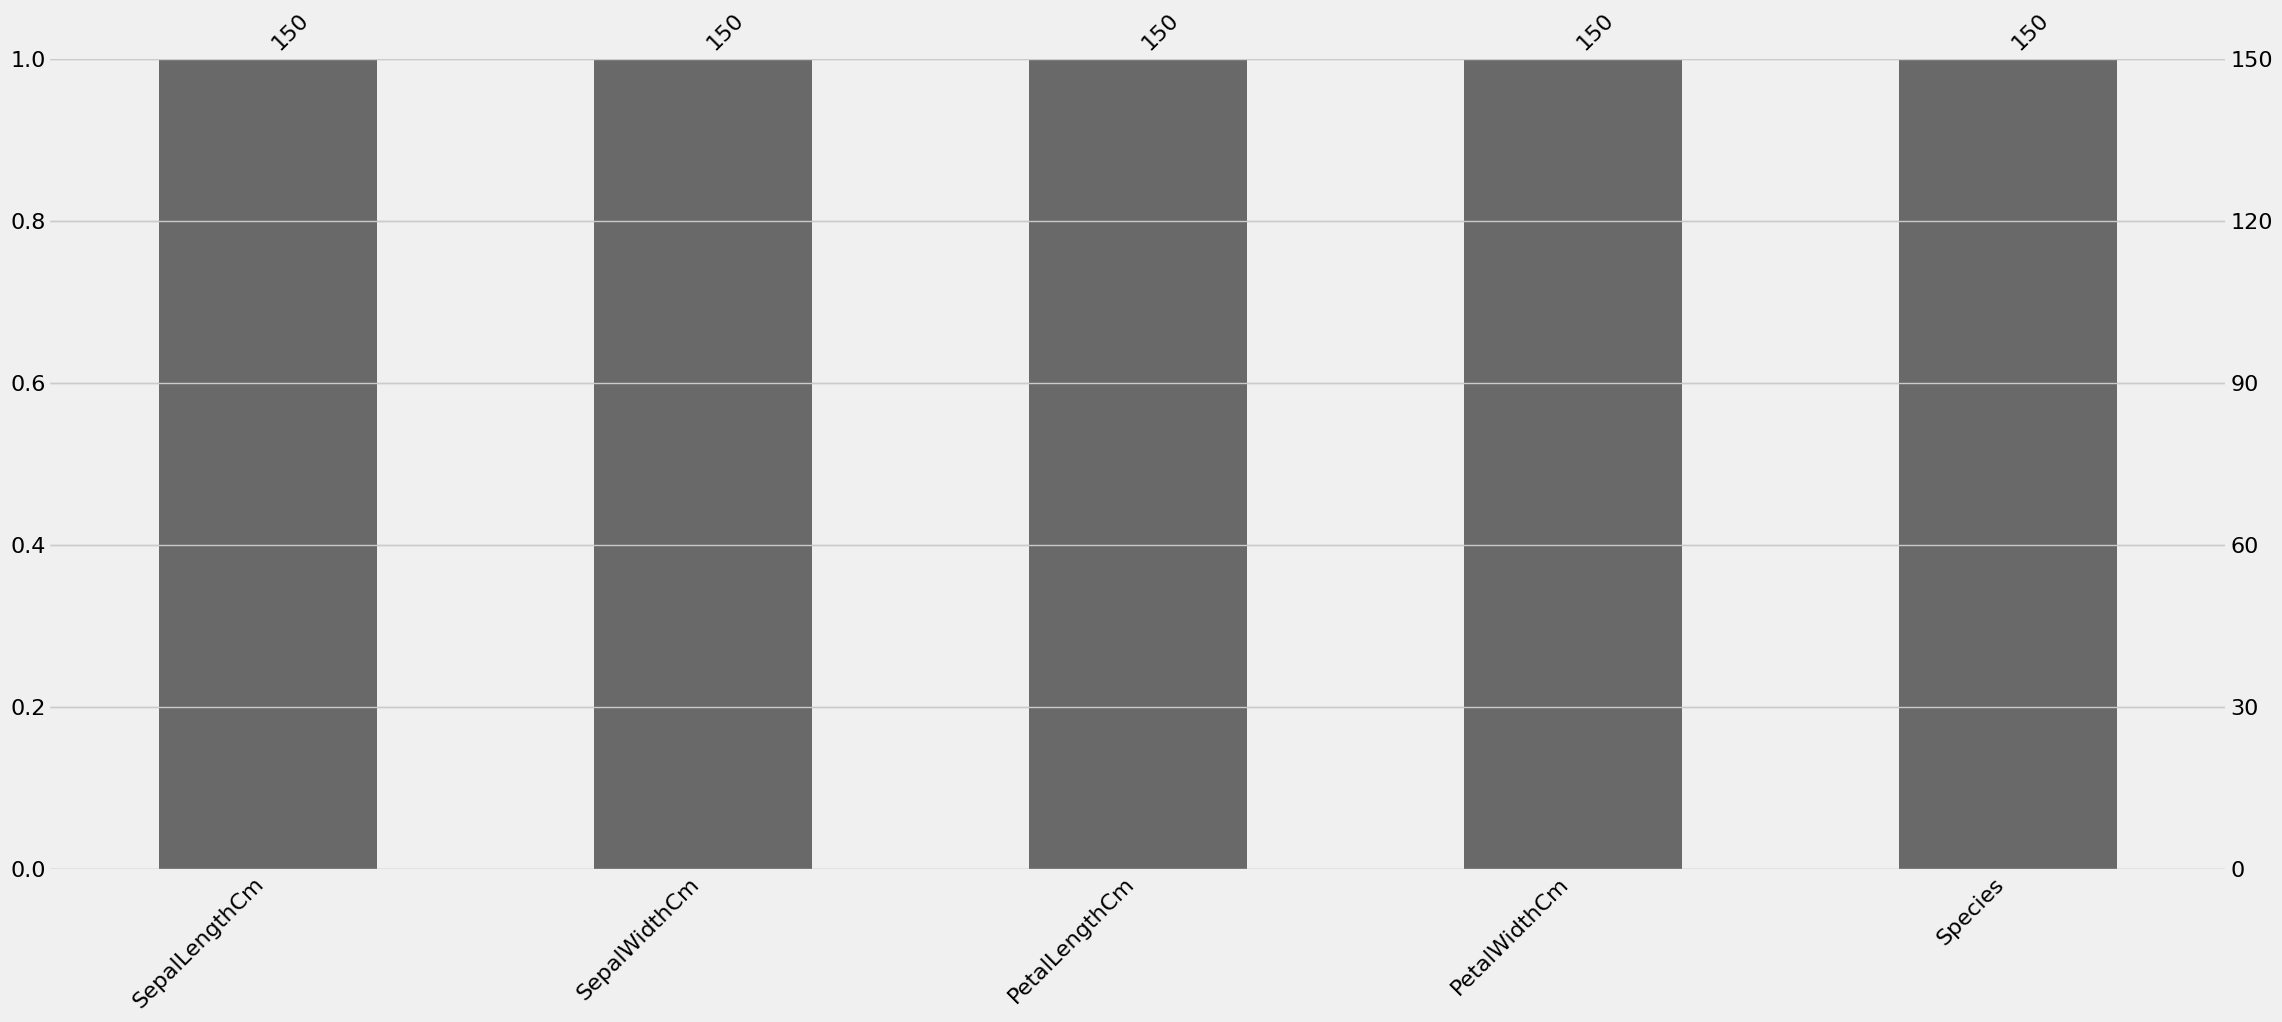

In [10]:
import missingno as msno
msno.bar(df)

In [11]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

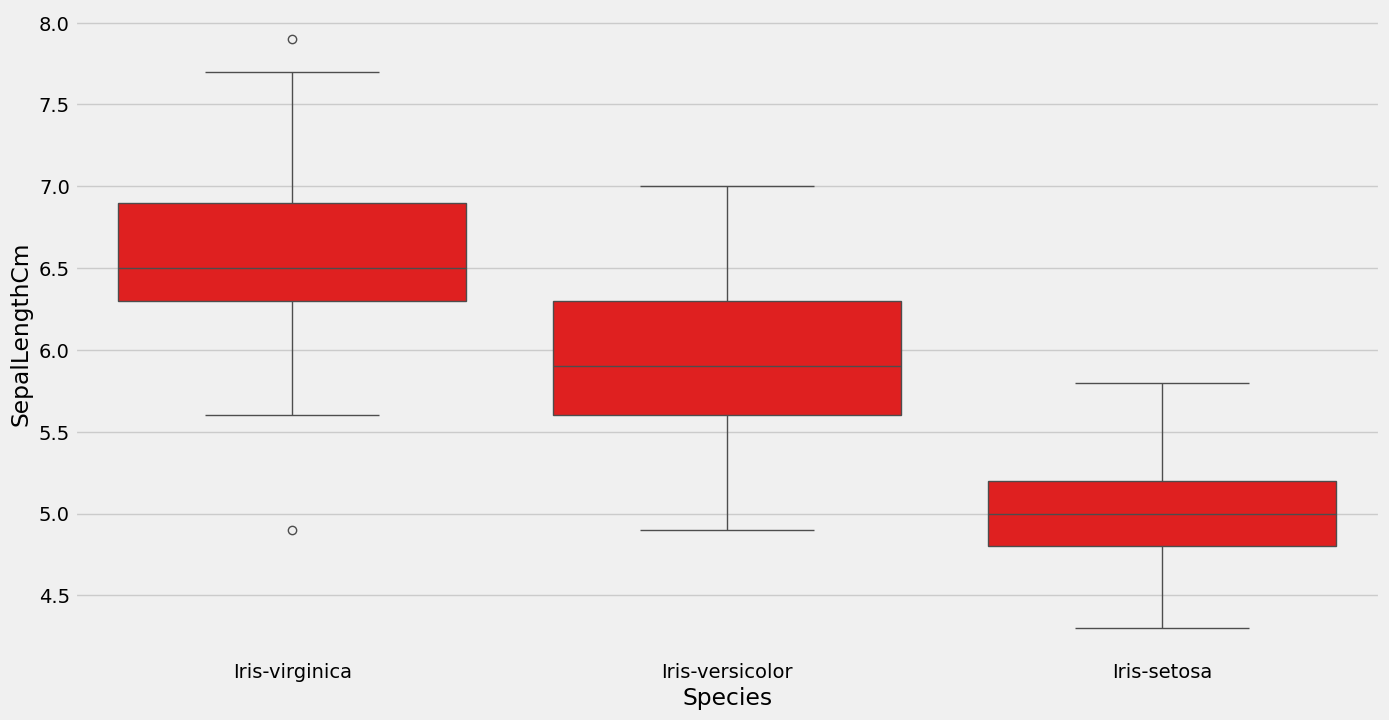

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',color='r',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

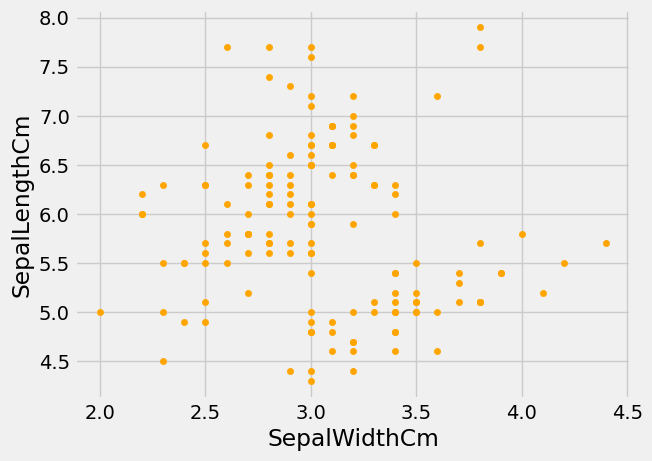

In [16]:
df.plot(kind='scatter',x='SepalWidthCm',color='orange',y='SepalLengthCm')


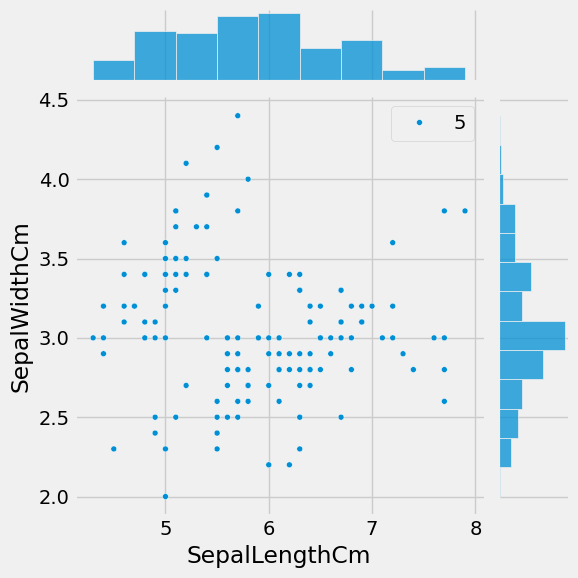

In [17]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

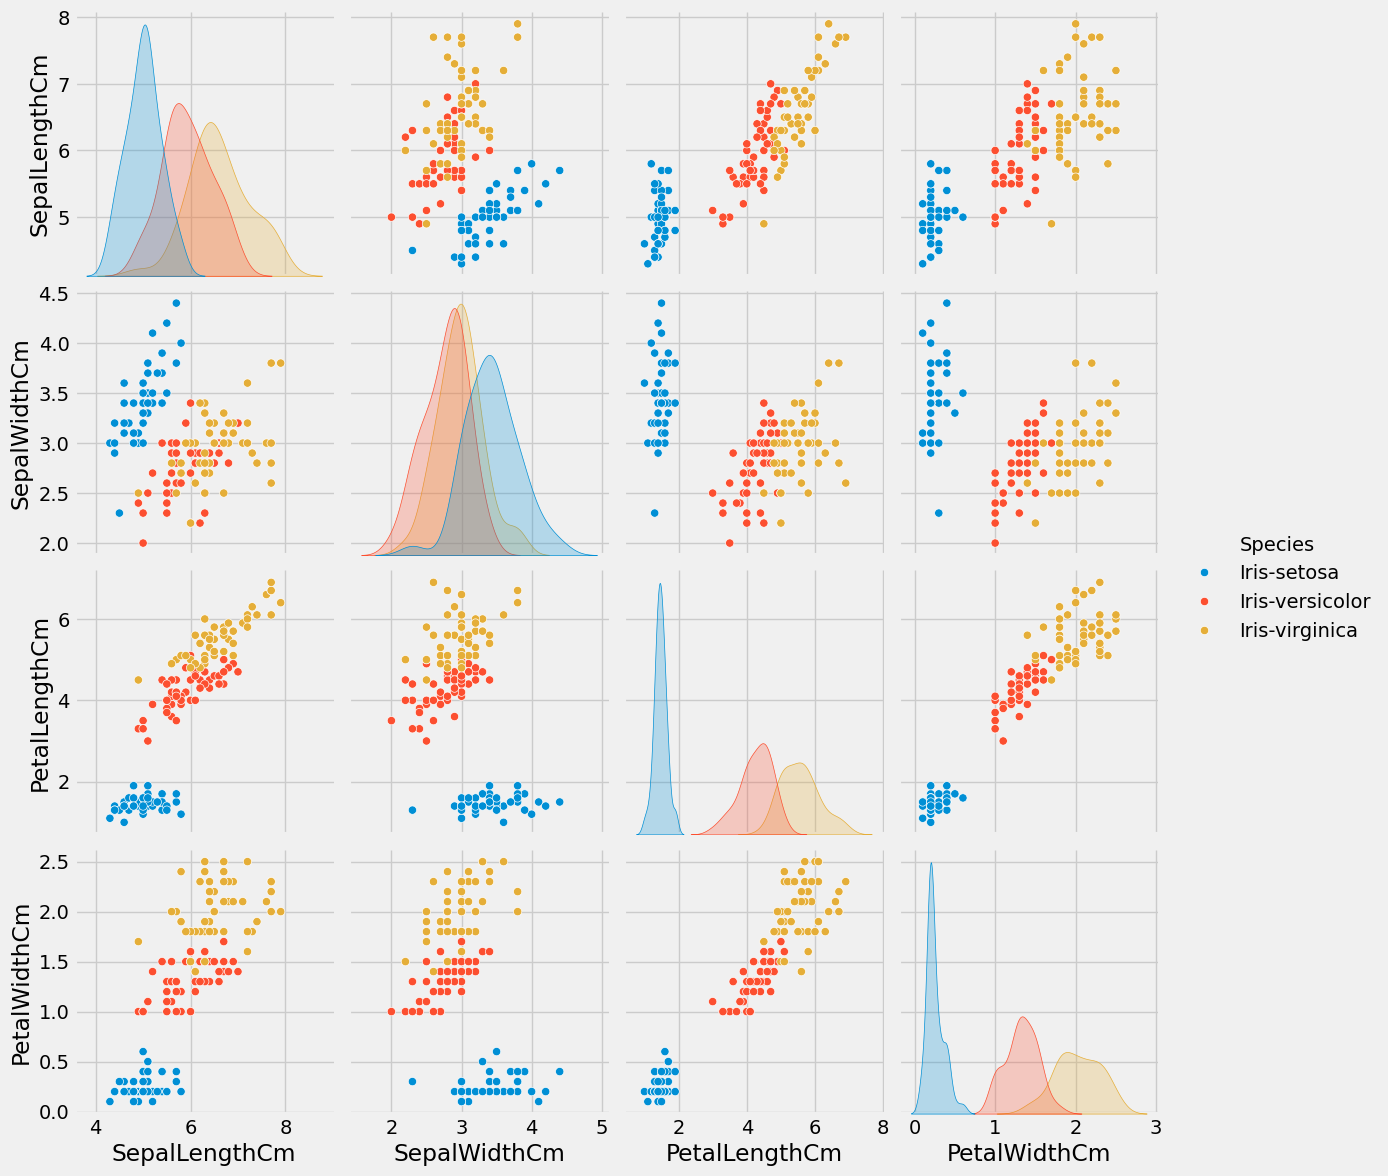

In [18]:
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

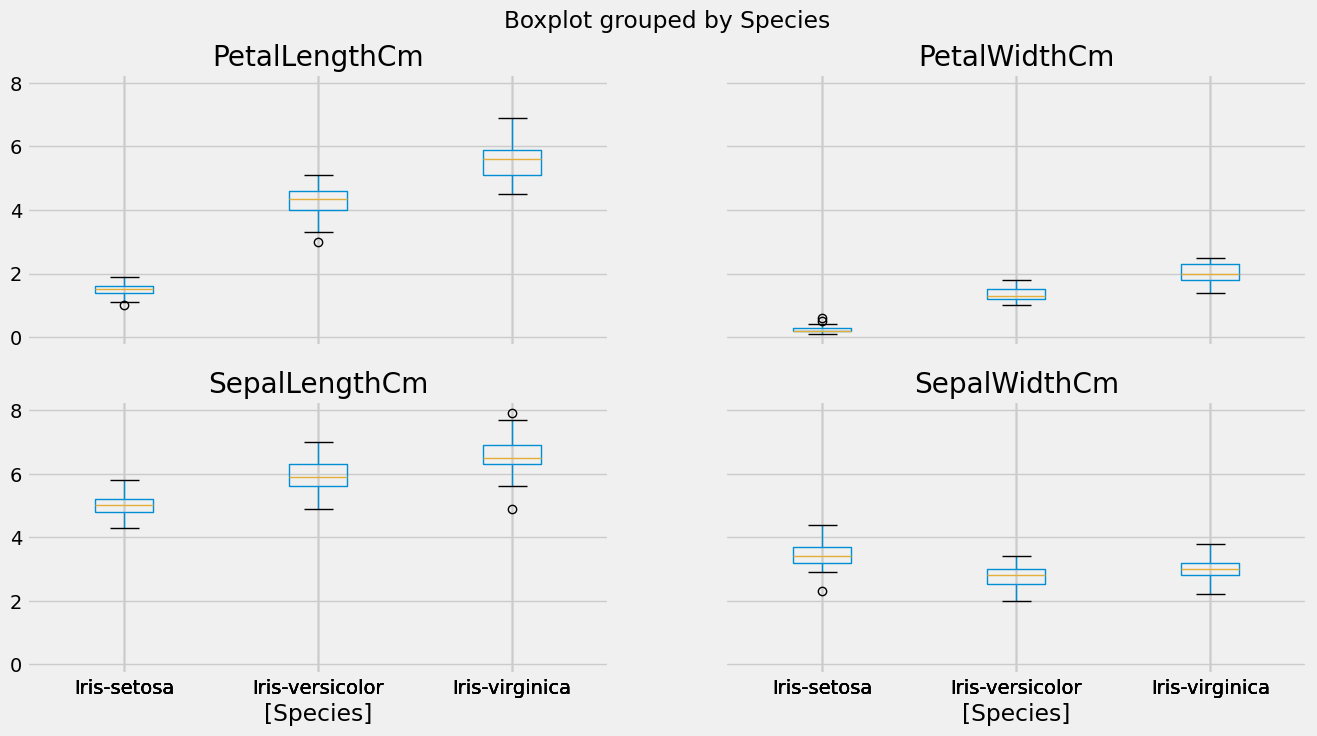

In [20]:
df.boxplot(by="Species", figsize=(16, 8))

<Axes: >

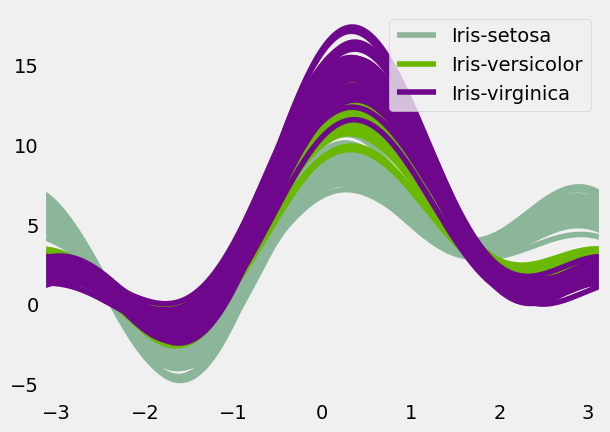

In [21]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

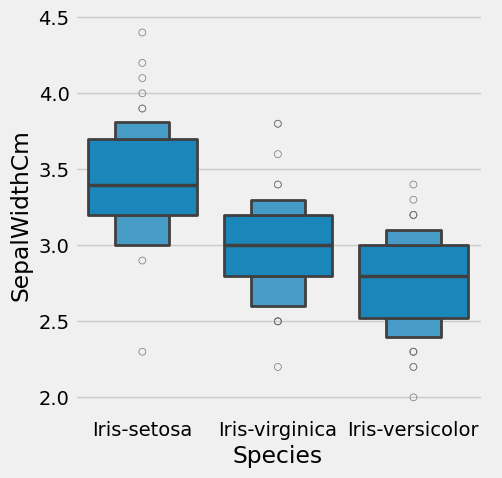

In [22]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

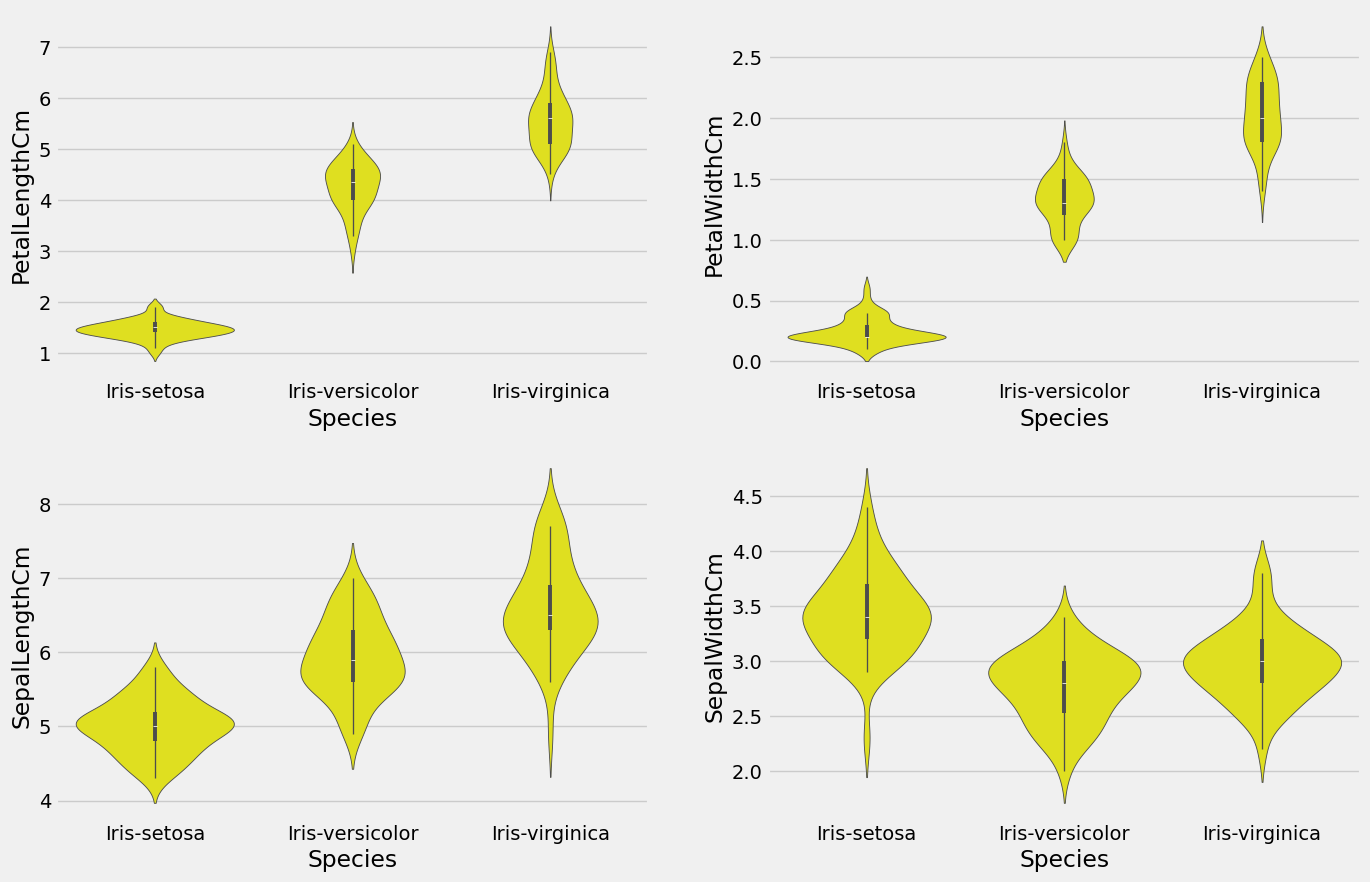

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',color='yellow',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',color='yellow',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',color='yellow',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',color='yellow',data=df)

In [26]:
X=df.drop('Species',axis=1)
y=df['Species']

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [28]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [30]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 3s 250ms/step - loss: 1.1228 - accuracy: 0.3333 - val_loss: 1.0539 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 33ms/step - loss: 1.0519 - accuracy: 0.4216 - val_loss: 1.0161 - val_accuracy: 0.3778
Epoch 3/45
4/4 [==============================] - 0s 24ms/step - loss: 1.0153 - accuracy: 0.3529 - val_loss: 0.9770 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 25ms/step - loss: 0.9726 - accuracy: 0.3529 - val_loss: 0.9237 - val_accuracy: 0.7111
Epoch 5/45
4/4 [==============================] - 0s 36ms/step - loss: 0.9236 - accuracy: 0.7843 - val_loss: 0.8764 - val_accuracy: 0.7556
Epoch 6/45
4/4 [==============================] - 0s 52ms/step - loss: 0.8798 - accuracy: 0.7157 - val_loss: 0.8397 - val_accuracy: 0.6667
Epoch 7/45
4/4 [==============================] - 0s 24ms/step - loss: 0.8447 - accuracy: 0.6569 - val_loss: 0.8079 - val_accuracy: 0.6667
Epoch 8/45
4/4 [==========

In [33]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3616 - accuracy: 0.9333


[0.3615567088127136, 0.9333333373069763]

In [34]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 144ms/step
[[0.00481169 0.3009622  0.69422615]
 [0.00382157 0.2865906  0.7095879 ]
 [0.06752264 0.5912649  0.34121245]
 [0.0399996  0.53574723 0.4242531 ]
 [0.9398792  0.05141788 0.0087029 ]
 [0.04018478 0.58612317 0.37369195]
 [0.00437771 0.23750159 0.7581207 ]
 [0.00482326 0.2531724  0.7420043 ]
 [0.9369257  0.05442126 0.00865299]
 [0.0095755  0.34898874 0.6414358 ]]


In [35]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [36]:
history.history['accuracy']

[0.3333333432674408,
 0.4215686321258545,
 0.3529411852359772,
 0.3529411852359772,
 0.7843137383460999,
 0.7156862616539001,
 0.656862735748291,
 0.656862735748291,
 0.6764705777168274,
 0.7941176295280457,
 0.8921568393707275,
 0.9607843160629272,
 0.9607843160629272,
 0.8725489974021912,
 0.813725471496582,
 0.7941176295280457,
 0.7941176295280457,
 0.7941176295280457,
 0.843137264251709,
 0.9313725233078003,
 0.970588207244873,
 0.9019607901573181,
 0.7843137383460999,
 0.8627451062202454,
 0.970588207244873,
 0.9019607901573181,
 0.8823529481887817,
 0.9019607901573181,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9411764740943909,
 0.9117646813392639,
 0.9509803652763367,
 0.970588207244873,
 0.9215686321258545,
 0.9117646813392639,
 0.9509803652763367,
 0.970588207244873,
 0.9607843160629272,
 0.9509803652763367,
 0.9607843160629272,
 0.970588207244873,
 0.9509803652763367,
 0.9509803652763367]

In [37]:
history.history['val_accuracy']

[0.3333333432674408,
 0.3777777850627899,
 0.3333333432674408,
 0.7111111283302307,
 0.7555555701255798,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7777777910232544,
 0.8444444537162781,
 0.9333333373069763,
 0.9555555582046509,
 0.8444444537162781,
 0.800000011920929,
 0.800000011920929,
 0.7777777910232544,
 0.7777777910232544,
 0.7777777910232544,
 0.8666666746139526,
 0.9555555582046509,
 0.9555555582046509,
 0.800000011920929,
 0.800000011920929,
 1.0,
 0.8888888955116272,
 0.8222222328186035,
 0.8444444537162781,
 0.8888888955116272,
 0.9777777791023254,
 0.9555555582046509,
 0.9111111164093018,
 0.8666666746139526,
 0.8888888955116272,
 0.9555555582046509,
 0.9555555582046509,
 0.9111111164093018,
 0.9555555582046509,
 0.9777777791023254,
 0.9111111164093018,
 0.9111111164093018,
 0.9111111164093018,
 0.9333333373069763,
 0.9111111164093018,
 0.8888888955116272,
 0.9333333373069763]